# 人工智能基础 Homework 4

# 机器学习基础 - 线性回归

## 一、一元线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("My Student Number and Name are:") #此处替换成你的学号和姓名
path =  'hw4data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

My Student Number and Name are: 191250186_余东骏


,Population,Profit
0,5.3456,12.1234
1,8.9876,6.0123
2,12.3456,10.5678
3,6.1101,17.5920
4,5.5277,9.1302


In [3]:
data.describe()

,Population,Profit
count,100.000000,100.000000
mean,8.181794,5.950996
std,3.845203,5.482274
min,5.026900,-2.680700
25%,5.690950,2.039925
50%,6.735950,4.744700
75%,8.865950,7.208625
max,22.203000,24.147000


看下数据长什么样子

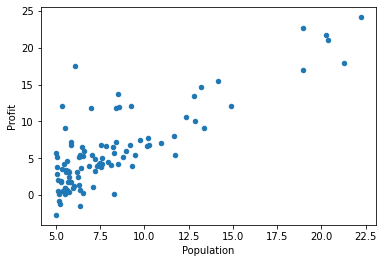

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(6,4))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化代价函数。 

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：
$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [5]:
def computeCost(X, y, theta):
    inner = np.power((theta.dot(X.T) - y.T) ,2)  # 填入一行代码，提示使用 np.power 和向量乘法
    # print(len(X))
    return np.sum(inner) / (2 * len(X))

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [6]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [7]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#y是所有行，最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [8]:
X.head()#head()是观察前5行

,Ones,Population
0,1,5.3456
1,1,8.9876
2,1,12.3456
3,1,6.1101
4,1,5.5277


In [9]:
y.head()

,Profit
0,12.1234
1,6.0123
2,10.5678
3,17.5920
4,9.1302


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta。

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.array([0,0])

theta 是一个(1,2)矩阵

In [11]:
theta

array([0, 0])

看下维度

In [12]:
X.shape, theta.shape, y.shape

((100, 2), (2,), (100, 1))

计算代价函数 (theta初始值为0). 
## 请注意，您需要按照作业要求提交下面的函数值。

In [13]:
computeCost(X, y, theta)

32.584566739582

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [14]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
#     print(temp.shape)
    theta = theta.ravel().reshape(1,-1)
#     print(theta.shape)
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
#         print(error.shape)
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
#         print(theta)
        cost[i] = computeCost(X, y, theta)  # 填入一行代码，计算每次迭代的代价函数值
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [15]:
alpha = 0.01
iters = 2000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。
## 请注意，您需要按照作业要求提交下面的参数值。

In [16]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

matrix([[-3.54102625,  1.16245055]])

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。
## 请注意，您需要按照作业要求提交下面的函数值。

In [17]:
computeCost(X, y, g)

4.805599378196047

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

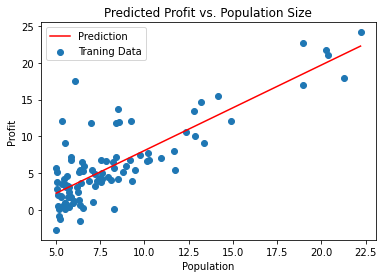

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

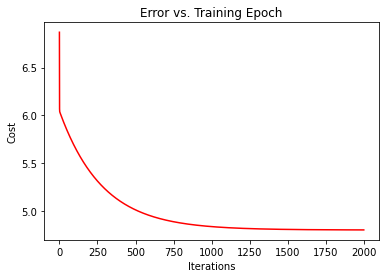

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 多元线性回归

本练习还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [20]:
path =  'hw4data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2000,3,388800
1,1200,2,250000
2,1800,4,300000
3,2104,3,399900
4,1600,3,329900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [21]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.024862,-0.208990,0.409597
1,-1.002485,-1.515179,-0.726624
2,-0.231975,1.097198,-0.317323
3,0.158417,-0.208990,0.500462
4,-0.488812,-0.208990,-0.072560


现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [22]:
add ones column
# data2.insert(0, 'Ones', 1)
data2.head()

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]  # 从数据集中取得 X，参考之前的一元线性回归练习代码即可
y2 = data2.iloc[:,cols-1:cols]  # 从数据集中取得 y

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)
g2

SyntaxError: invalid syntax (<ipython-input-22-37cc36750f94>, line 1)

## 请注意，您需要按照作业要求提交上面的参数值。
我们也可以快速查看这一个的训练进程。

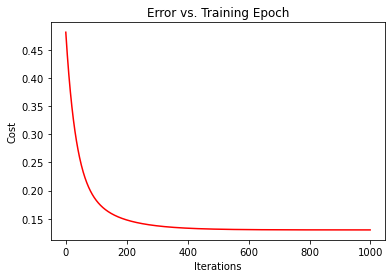

In [162]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [163]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

scikit-learn model的预测表现

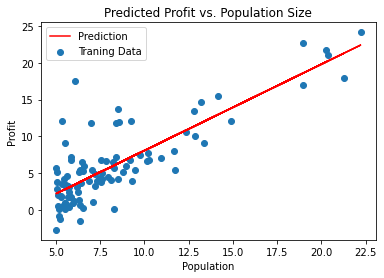

In [164]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [165]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta

In [166]:
final_theta2=normalEqn(X, y) #与批量梯度下降的theta的值略有差距
final_theta2

matrix([[-3.64747101],
        [ 1.17314944]])

## 请注意，您需要按照作业要求提交上面的参数值。